In [57]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [58]:
import keras
import tensorflow

In [59]:
df = pd.read_csv('Nega.csv')


In [60]:
df.isnull().values.any()

df.shape

(9112, 5)

In [61]:
df.head(5)

,App_name,Category,User_Review,Sentiments,Review_Type
0,brainly,Education,Not working properly plz fix the problem,Negative,AC
1,brainly,Education,"App is not good, stuck in between",Negative,AC
2,brainly,Education,not working properly,Negative,AC
3,brainly,Education,app is not working,Negative,AC
4,brainly,Education,this app will be not started some issue,Negative,AC


In [62]:
df["User_Review"][3]


'app is not working'

<AxesSubplot:xlabel='Review_Type', ylabel='count'>

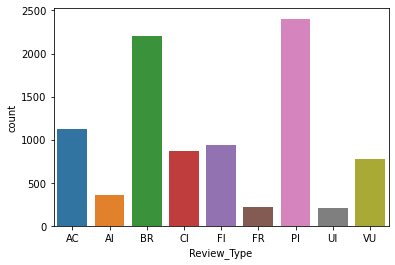

In [63]:
import seaborn as sns

sns.countplot(x='Review_Type', data=df)

In [64]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [65]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [67]:
X = []
sentences = list(df['User_Review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [68]:
X[3]


'app is not working'

In [69]:
y = df['Review_Type']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))
print(y)

[0 0 0 ... 0 0 0]


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [72]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [73]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('D:/MS/Thesis/Submit/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [74]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [75]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [76]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          653200    
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 10001     
Total params: 663,201
Trainable params: 10,001
Non-trainable params: 653,200
_________________________________________________________________
None


In [77]:
history = model.fit(X_train, y_train, batch_size=100, epochs=6, validation_split=0.1)


Epoch 1/6
66/66 [==============================] - 1s 11ms/step - loss: 0.1136 - acc: 0.9829 - val_loss: 0.0409 - val_acc: 0.9973
Epoch 2/6
66/66 [==============================] - 0s 6ms/step - loss: 0.0346 - acc: 0.9963 - val_loss: 0.0273 - val_acc: 0.9973
Epoch 3/6
66/66 [==============================] - 0s 6ms/step - loss: 0.0248 - acc: 0.9971 - val_loss: 0.0217 - val_acc: 0.9973
Epoch 4/6
66/66 [==============================] - 0s 7ms/step - loss: 0.0200 - acc: 0.9973 - val_loss: 0.0184 - val_acc: 0.9973
Epoch 5/6
66/66 [==============================] - 0s 7ms/step - loss: 0.0171 - acc: 0.9980 - val_loss: 0.0163 - val_acc: 0.9973
Epoch 6/6
66/66 [==============================] - 0s 6ms/step - loss: 0.0152 - acc: 0.9983 - val_loss: 0.0148 - val_acc: 0.9973


In [78]:
score = model.evaluate(X_test, y_test, verbose=1)


57/57 [==============================] - 0s 3ms/step - loss: 0.0144 - acc: 0.9989


In [79]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.014445573091506958
Test Accuracy: 0.9989029169082642


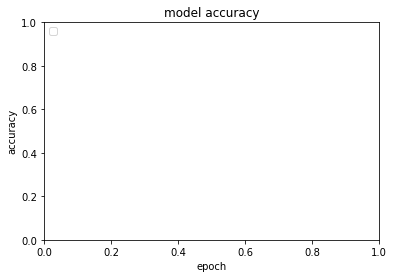

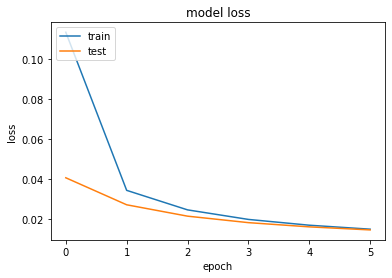

In [80]:
import matplotlib.pyplot as plt

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [81]:
import tensorflow
from keras import layers


In [82]:
max_words = 5000

In [83]:
#model = Sequential()
#embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
#model.add(embedding_layer)
#model.add(LSTM(128))
model1 = Sequential()
model1.add(layers.Embedding(max_words, 20))
model1.add(layers.LSTM(15,dropout=0.5))
model1.add(layers.Dense(3,activation='softmax'))



model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [84]:
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          653200    
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 10001     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 663,203
Trainable params: 10,003
Non-trainable params: 653,200
_________________________________________________________________
None


In [85]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.3)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
40/40 [==============================] - 1s 15ms/step - loss: 0.6894 - acc: 0.9038 - val_loss: 0.6771 - val_acc: 0.9721
Epoch 2/6
40/40 [==============================] - 0s 9ms/step - loss: 0.6684 - acc: 0.9735 - val_loss: 0.6572 - val_acc: 0.9858
Epoch 3/6
40/40 [==============================] - 0s 9ms/step - loss: 0.6488 - acc: 0.9845 - val_loss: 0.6382 - val_acc: 0.9904
Epoch 4/6
40/40 [==============================] - 1s 13ms/step - loss: 0.6301 - acc: 0.9869 - val_loss: 0.6199 - val_acc: 0.9909
Epoch 5/6
40/40 [==============================] - 0s 9ms/step - loss: 0.6119 - acc: 0.9880 - val_loss: 0.6022 - val_acc: 0.9909
Epoch 6/6
57/57 [==============================] - 0s 3ms/step - loss: 0.5856 - acc: 0.9890


In [86]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5856424570083618
Test Accuracy: 0.989029049873352


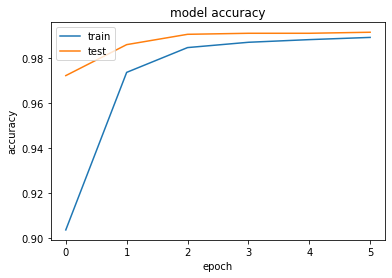

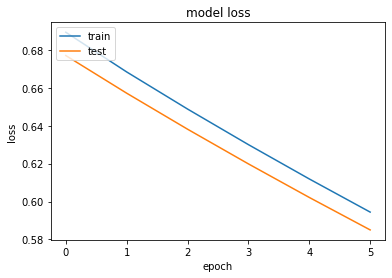

In [87]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()